Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from metrics_module import metrics
from dataloader_module import load_data

D:\.anaconda\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\.anaconda\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Càrrega i pre-processament de les dades

In [4]:
datafile = "data/healthcare-dataset-stroke-data.csv"

X, y = load_data(datafile)
#X.drop(columns=["age"], inplace=True)
print(f"X shape: {X.shape}, y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X shape: (418, 18), y shape: (418,)


## Creació i test de la regressió logística

Accuracy: 0.7857
Precision: 0.7500
Recall: 0.8571
F1 Score: 0.8000


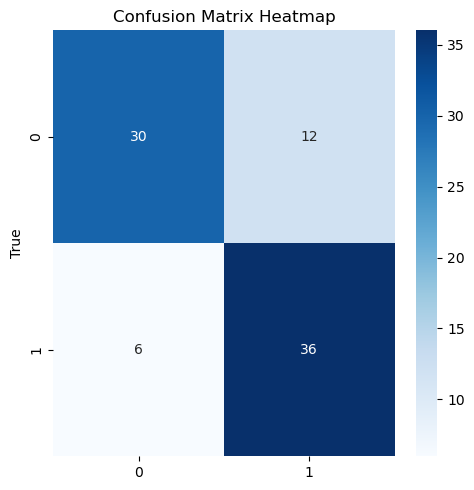

In [5]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## Visualització dels factors més importants pel model

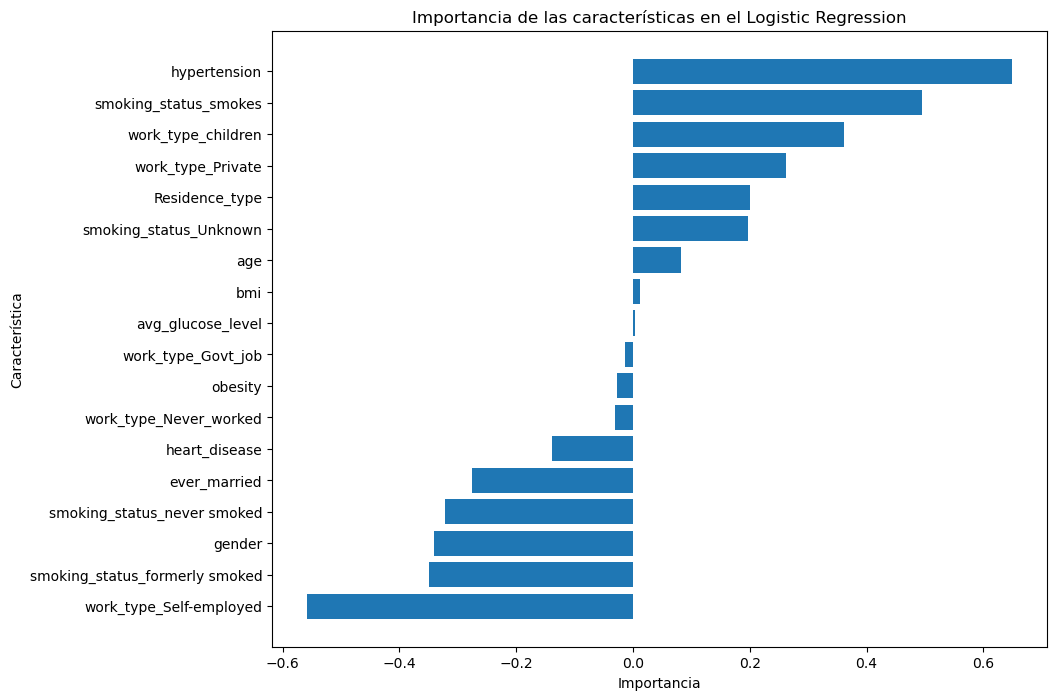

In [6]:
feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# compute importances
model_fi = permutation_importance(clf, X, y)
model_fi['importances_mean']

# create a dataframe with feature importances
fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_fi['importances_mean']
})

# sort the dataframe by importance
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# print the sorted feature importances
for index, row in fi_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

age: 0.2794258373205742
smoking_status_never smoked: 0.020095693779904344
smoking_status_smokes: 0.014354066985645963
avg_glucose_level: 0.011483253588516784
bmi: 0.008612440191387604
smoking_status_Unknown: 0.006220095693779926
work_type_Self-employed: 0.006220095693779926
ever_married: 0.0057416267942584035
hypertension: 0.0052631578947368585
gender: 0.002870813397129224
work_type_children: 0.0019138755980861344
heart_disease: 0.001435406698564634
Residence_type: 0.0009569377990430672
work_type_Govt_job: 0.0004784688995215669
work_type_Private: 0.0004784688995215669
work_type_Never_worked: 0.0
obesity: -0.002870813397129157
smoking_status_formerly smoked: -0.0038277511961722467


## Eliminació d'alguns factors

Prova per a evaluar si es poden generar prediccions sense dades mèdiques, més accessibles per a la població general.

Accuracy: 0.7738
Precision: 0.7255
Recall: 0.8810
F1 Score: 0.7957


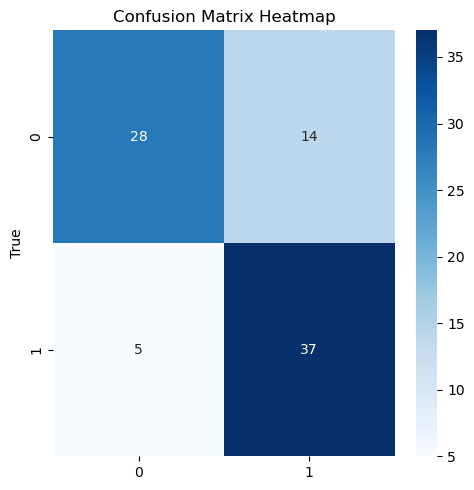

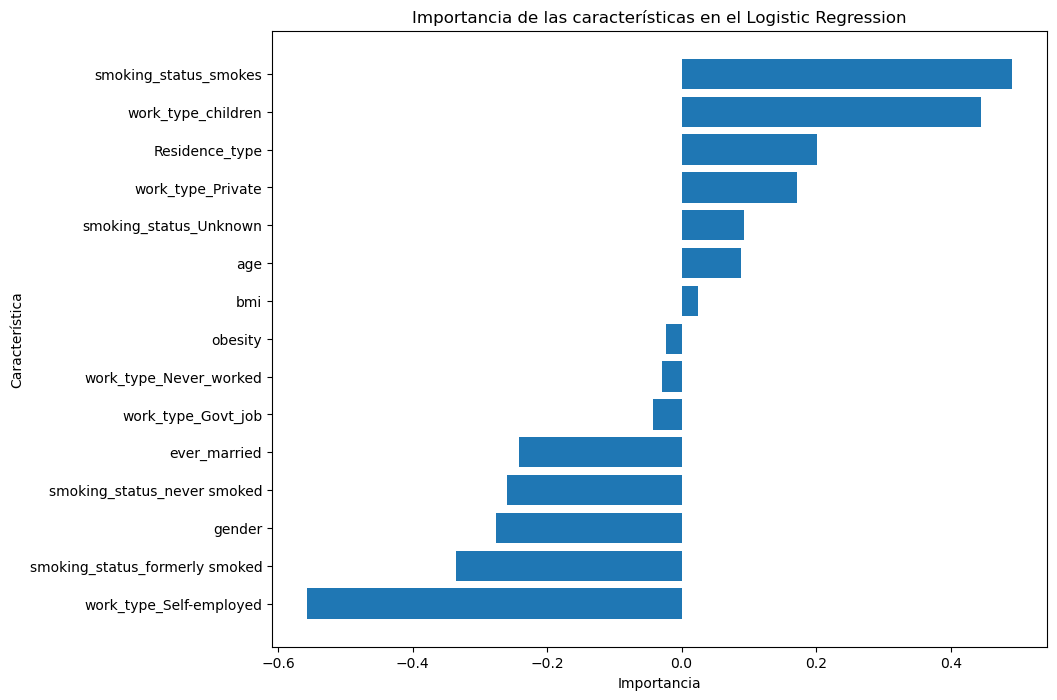

In [8]:
X = X.drop(columns=["hypertension", "heart_disease", "avg_glucose_level"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

## ROC Curve i AUC

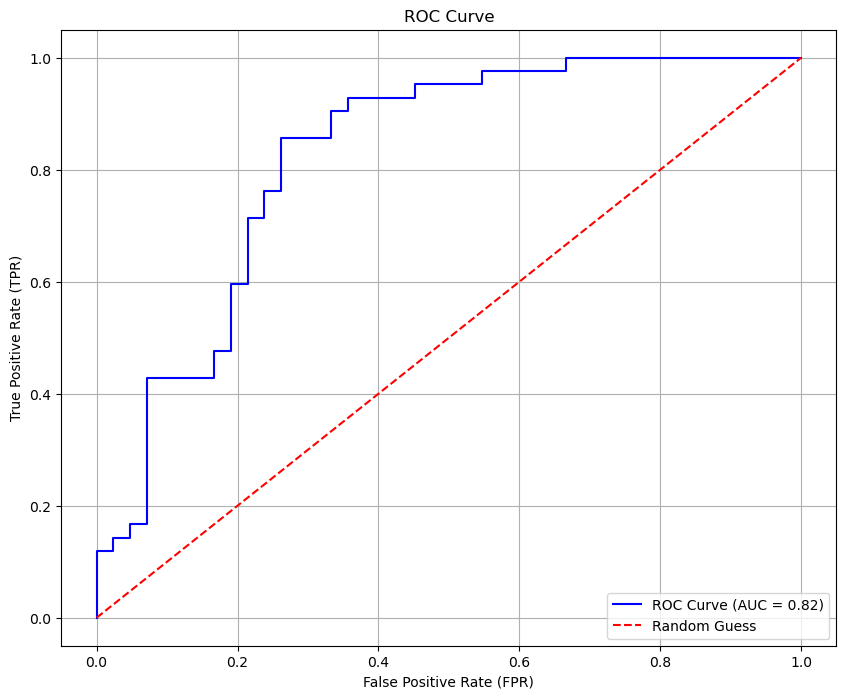

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()